In [17]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
pd.set_option('display.max_columns', 500)

rounds = pd.read_csv('../Data/fight_rounds.csv')
fights = pd.read_csv('../Data/fights.csv')
fight_details = pd.read_csv('../Data/fight_details.csv')
fighters = pd.read_csv('../Data/fighters.csv')

In [19]:
fight_rnd_pivot = rounds.set_index(['Round', 'Fight Link'], drop=True).unstack('Round')
fight_rnd_pivot.columns = [f"R{col[1]}_{col[0].replace(' ', '_')}" for col in fight_rnd_pivot.columns.values]
fight_rnd_pivot.reset_index(inplace=True)
fight_rnd_pivot.head(5)

,Fight Link,R1_F2_Ground,R2_F2_Ground,R3_F2_Ground,R4_F2_Ground,R5_F2_Ground,R1_F2_Clinch,R2_F2_Clinch,R3_F2_Clinch,R4_F2_Clinch,R5_F2_Clinch,R1_F2_Distance,R2_F2_Distance,R3_F2_Distance,R4_F2_Distance,R5_F2_Distance,R1_F2_Leg,R2_F2_Leg,R3_F2_Leg,R4_F2_Leg,R5_F2_Leg,R1_F2_Body,R2_F2_Body,R3_F2_Body,R4_F2_Body,R5_F2_Body,R1_F2_Head,R2_F2_Head,R3_F2_Head,R4_F2_Head,R5_F2_Head,R1_F1_Ground,R2_F1_Ground,R3_F1_Ground,R4_F1_Ground,R5_F1_Ground,R1_F1_Clinch,R2_F1_Clinch,R3_F1_Clinch,R4_F1_Clinch,R5_F1_Clinch,R1_F1_Distance,R2_F1_Distance,R3_F1_Distance,R4_F1_Distance,R5_F1_Distance,R1_F1_Leg,R2_F1_Leg,R3_F1_Leg,R4_F1_Leg,R5_F1_Leg,R1_F1_Body,R2_F1_Body,R3_F1_Body,R4_F1_Body,R5_F1_Body,R1_F1_Head,R2_F1_Head,R3_F1_Head,R4_F1_Head,R5_F1_Head,R1_F2_Control_Time,R2_F2_Control_Time,R3_F2_Control_Time,R4_F2_Control_Time,R5_F2_Control_Time,R1_F2_Reversals,R2_F2_Reversals,R3_F2_Reversals,R4_F2_Reversals,R5_F2_Reversals,R1_F2_Sub_Attacks,R2_F2_Sub_Attacks,R3_F2_Sub_Attacks,R4_F2_Sub_Attacks,R5_F2_Sub_Attacks,R1_F2_Takedown_Perc,R2_F2_Takedown_Perc,R3_F2_Takedown_Perc,R4_F2_Takedown_Perc,R5_F2_Takedown_Perc,R1_F2_Takedowns,R2_F2_Takedowns,R3_F2_Takedowns,R4_F2_Takedowns,R5_F2_Takedowns,R1_F2_Total_Strikes,R2_F2_Total_Strikes,R3_F2_Total_Strikes,R4_F2_Total_Strikes,R5_F2_Total_Strikes,R1_F2_Sig_Strike_Perc,R2_F2_Sig_Strike_Perc,R3_F2_Sig_Strike_Perc,R4_F2_Sig_Strike_Perc,R5_F2_Sig_Strike_Perc,R1_F2_Sig_Strikes,R2_F2_Sig_Strikes,R3_F2_Sig_Strikes,R4_F2_Sig_Strikes,R5_F2_Sig_Strikes,R1_F2_Knockdowns,R2_F2_Knockdowns,R3_F2_Knockdowns,R4_F2_Knockdowns,R5_F2_Knockdowns,R1_F1_Control_Time,R2_F1_Control_Time,R3_F1_Control_Time,R4_F1_Control_Time,R5_F1_Control_Time,R1_F1_Reversals,R2_F1_Reversals,R3_F1_Reversals,R4_F1_Reversals,R5_F1_Reversals,R1_F1_Sub_Attacks,R2_F1_Sub_Attacks,R3_F1_Sub_Attacks,R4_F1_Sub_Attacks,R5_F1_Sub_Attacks,R1_F1_Takedown_Perc,R2_F1_Takedown_Perc,R3_F1_Takedown_Perc,R4_F1_Takedown_Perc,R5_F1_Takedown_Perc,R1_F1_Takedowns,R2_F1_Takedowns,R3_F1_Takedowns,R4_F1_Takedowns,R5_F1_Takedowns,R1_F1_Total_Strikes,R2_F1_Total_Strikes,R3_F1_Total_Strikes,R4_F1_Total_Strikes,R5_F1_Total_Strikes,R1_F1_Sig_Strike_Perc,R2_F1_Sig_Strike_Perc,R3_F1_Sig_Strike_Perc,R4_F1_Sig_Strike_Perc,R5_F1_Sig_Strike_Perc,R1_F1_Sig_Strikes,R2_F1_Sig_Strikes,R3_F1_Sig_Strikes,R4_F1_Sig_Strikes,R5_F1_Sig_Strikes,R1_F1_Knockdowns,R2_F1_Knockdowns,R3_F1_Knockdowns,R4_F1_Knockdowns,R5_F1_Knockdowns
0,http://ufcstats.com/fight-details/0005e00b07ce...,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,2 of 2,1 of 1,1 of 1,0 of 0,12 of 31,10 of 30,8 of 24,17 of 41,18 of 55,8 of 13,5 of 7,2 of 2,2 of 2,2 of 3,1 of 4,2 of 4,3 of 4,3 of 6,3 of 12,3 of 14,5 of 21,4 of 19,13 of 34,13 of 40,0 of 0,2 of 2,9 of 24,2 of 2,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,1 of 1,21 of 50,21 of 45,14 of 27,37 of 56,47 of 94,5 of 7,5 of 5,1 of 1,6 of 6,0 of 0,8 of 10,8 of 11,10 of 12,19 of 24,11 of 11,8 of 33,10 of 31,12 of 38,14 of 28,37 of 84,0:00,0:00,0:03,0:00,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,---,---,---,---,---,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,13 of 32,17 of 37,11 of 27,19 of 43,32 of 71,38%,37%,36%,42%,32%,12 of 31,12 of 32,9 of 25,18 of 42,18 of 55,0.0,0.0,0.0,0.0,0.0,0:39,1:19,2:06,0:33,0:39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33%,33%,50%,33%,33%,1 of 3,1 of 3,1 of 2,1 of 3,1 of 3,31 of 60,27 of 53,37 of 67,39 of 60,53 of 102,42%,48%,45%,67%,50%,21 of 50,23 of 47,23 of 51,39 of 58,48 of 95,0.0,0.0,0.0,0.0,0.0
1,http://ufcstats.com/fight-details/000da3152b7b...,1 of 1,4 of 6,2 of 2,NaN,NaN,2 of 2,3 of 7,0 of 0,NaN,NaN,4 of 8,0 of 6,3 of 7,NaN,NaN,1 of 1,0 of 0,0 of 0,NaN,NaN,1 of 1,0 of 1,0 of 0,NaN,NaN,5 of 9,7 of 18,5 of 9,NaN,NaN,1 of 2,0 of 0,4 of 8,NaN,NaN,5 of 11,10 of 16,1 of 1,NaN,NaN,8 of 26,3 of 10,3 of 14,NaN,NaN,3 of 3,1 of 1,0 of 0,NaN,NaN,2 of 3,5 of 6,2 of 3,NaN,NaN,9 of 33,7 of 19,6 of 20,NaN,NaN,0:41,2:29,0:00,NaN,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,---,50%,0%,NaN,NaN,0 of 0,1 of 2,0 of 1,NaN,NaN,11 of 15,16 of 28,15 of 21,NaN,NaN,63%,36%,55%,NaN,NaN,7 of

In [20]:
fights_lite = fights[['Link', 'Fighter1', 'Fighter2', 'Finish Type', 'F1 Link', 'F2 Link']]
fights_rounds = fights_lite.merge(fight_rnd_pivot, right_on='Fight Link', left_on='Link')

common_cols = ['Finish Type']
f1_cols = ['Fighter1'] + common_cols + [col for col in fights_rounds.columns if 'F1' in col]
f2_cols = ['Fighter2'] + common_cols + [col for col in fights_rounds.columns if 'F2' in col]

fights_rounds_f1 = fights_rounds[f1_cols]
fights_rounds_f2 = fights_rounds[f2_cols]

fights_rounds_f1.columns = [col \
              .replace('F1', '') \
              .replace('Fighter1', 'Fighter') \
              .replace('__', '_') \
              .strip() for col in fights_rounds_f1.columns]

fights_rounds_f2.columns = [col \
              .replace('F2', '') \
              .replace('Fighter2', 'Fighter') \
              .replace('__', '_') \
              .strip() for col in fights_rounds_f2.columns]

fights_rounds_split = pd.concat([fights_rounds_f1, fights_rounds_f2]).reset_index(drop=True)
fights_rounds_split.head()

,Fighter,Finish Type,Link,R1_Ground,R2_Ground,R3_Ground,R4_Ground,R5_Ground,R1_Clinch,R2_Clinch,R3_Clinch,R4_Clinch,R5_Clinch,R1_Distance,R2_Distance,R3_Distance,R4_Distance,R5_Distance,R1_Leg,R2_Leg,R3_Leg,R4_Leg,R5_Leg,R1_Body,R2_Body,R3_Body,R4_Body,R5_Body,R1_Head,R2_Head,R3_Head,R4_Head,R5_Head,R1_Control_Time,R2_Control_Time,R3_Control_Time,R4_Control_Time,R5_Control_Time,R1_Reversals,R2_Reversals,R3_Reversals,R4_Reversals,R5_Reversals,R1_Sub_Attacks,R2_Sub_Attacks,R3_Sub_Attacks,R4_Sub_Attacks,R5_Sub_Attacks,R1_Takedown_Perc,R2_Takedown_Perc,R3_Takedown_Perc,R4_Takedown_Perc,R5_Takedown_Perc,R1_Takedowns,R2_Takedowns,R3_Takedowns,R4_Takedowns,R5_Takedowns,R1_Total_Strikes,R2_Total_Strikes,R3_Total_Strikes,R4_Total_Strikes,R5_Total_Strikes,R1_Sig_Strike_Perc,R2_Sig_Strike_Perc,R3_Sig_Strike_Perc,R4_Sig_Strike_Perc,R5_Sig_Strike_Perc,R1_Sig_Strikes,R2_Sig_Strikes,R3_Sig_Strikes,R4_Sig_Strikes,R5_Sig_Strikes,R1_Knockdowns,R2_Knockdowns,R3_Knockdowns,R4_Knockdowns,R5_Knockdowns
0,Alex Pereira,KO/TKO,http://ufcstats.com/fighter-details/e5549c82bf...,0 of 0,0 of 0,1 of 1,0 of 0,0 of 0,4 of 5,2 of 3,1 of 1,4 of 5,3 of 3,19 of 36,15 of 33,6 of 12,11 of 24,25 of 34,14 of 19,1 of 5,2 of 3,3 of 6,2 of 2,8 of 10,4 of 6,3 of 3,4 of 5,8 of 9,1 of 12,12 of 25,3 of 8,8 of 18,18 of 26,0:06,0:21,0:00,0:02,0:02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,---,100%,---,---,---,0 of 0,1 of 1,0 of 0,0 of 0,0 of 0,28 of 46,33 of 54,19 of 29,30 of 45,30 of 40,56%,47%,57%,51%,75%,23 of 41,17 of 36,8 of 14,15 of 29,28 of 37,0.0,0.0,0.0,0.0,0.0
1,Zhang Weili,SUB,http://ufcstats.com/fighter-details/1ebe20ebbf...,13 of 15,0 of 0,NaN,NaN,NaN,0 of 0,0 of 0,NaN,NaN,NaN,20 of 50,4 of 13,NaN,NaN,NaN,8 of 10,1 of 1,NaN,NaN,NaN,6 of 7,2 of 2,NaN,NaN,NaN,19 of 48,1 of 10,NaN,NaN,NaN,1:00,0:30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,---,---,NaN,NaN,NaN,0 of 0,0 of 0,NaN,NaN,NaN,38 of 77,4 of 13,NaN,NaN,NaN,50%,30%,NaN,NaN,NaN,33 of 65,4 of 13,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,Dustin Poirier,SUB,http://ufcstats.com/fighter-details/029eaff01e...,0 of 0,0 of 0,3 of 6,NaN,NaN,3 of 4,0 of 0,0 of 0,NaN,NaN,25 of 53,2 of 3,5 of 10,NaN,NaN,1 of 2,0 of 0,1 of 1,NaN,NaN,2 of 2,0 of 0,0 of 0,NaN,NaN,25 of 53,2 of 3,7 of 15,NaN,NaN,0:00,0:00,0:47,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2.0,NaN,NaN,---,---,---,NaN,NaN,0 of 0,0 of 0,0 of 0,NaN,NaN,31 of 61,23 of 25,9 of 19,NaN,NaN,49%,66%,50%,NaN,NaN,28 of 57,2 of 3,8 of 16,NaN,NaN,0.0,0.0,0.0,NaN,NaN
3,Chris Gutierrez,KO/TKO,http://ufcstats.com/fighter-details/45f0cc9d18...,0 of 0,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,10 of 20,NaN,NaN,NaN,NaN,4 of 5,NaN,NaN,NaN,NaN,0 of 1,NaN,NaN,NaN,NaN,6 of 14,NaN,NaN,NaN,NaN,0:01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,---,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,10 of 20,NaN,NaN,NaN,NaN,50%,NaN,NaN,NaN,NaN,10 of 20,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,Dan Hooker,KO/TKO,http://ufcstats.com/fighter-details/193b9d1858...,0 of 0,5 of 5,NaN,NaN,NaN,0 of 0,0 of 0,NaN,NaN,NaN,10 of 27,14 of 31,NaN,NaN,NaN,6 of 11,2 of 2,NaN,NaN,NaN,2 of 3,11 of 13,NaN,NaN,NaN,2 of 13,6 of 21,NaN,NaN,NaN,1:11,0:57,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,---,---,NaN,NaN,NaN,0 of 0,0 of 0,NaN,NaN,NaN,16 of 35,21 of 38,NaN,NaN,NaN,37%,52%,NaN,NaN,NaN,10 of 27,19 of 36,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN


In [21]:
fighters_lite = fighters[['Name', 'Link', 'Sub Avg', 'Takedown Def', 'Takedown Acc', 'Takedown Avg', 'Striking Def', 'Sapm', 'Striking Acc', 'Slpm', 'Stance', 'Reach', 'Weight', 'Height']]
raw_data = fighters_lite.merge(fights_rounds_split, left_on='Link', right_on='Link')
fighter_names = raw_data['Name']
raw_data.drop(['Name', 'Link', 'Fighter'], axis=1, inplace=True)
raw_data

,Sub Avg,Takedown Def,Takedown Acc,Takedown Avg,Striking Def,Sapm,Striking Acc,Slpm,Stance,Reach,Weight,Height,Finish Type,R1_Ground,R2_Ground,R3_Ground,R4_Ground,R5_Ground,R1_Clinch,R2_Clinch,R3_Clinch,R4_Clinch,R5_Clinch,R1_Distance,R2_Distance,R3_Distance,R4_Distance,R5_Distance,R1_Leg,R2_Leg,R3_Leg,R4_Leg,R5_Leg,R1_Body,R2_Body,R3_Body,R4_Body,R5_Body,R1_Head,R2_Head,R3_Head,R4_Head,R5_Head,R1_Control_Time,R2_Control_Time,R3_Control_Time,R4_Control_Time,R5_Control_Time,R1_Reversals,R2_Reversals,R3_Reversals,R4_Reversals,R5_Reversals,R1_Sub_Attacks,R2_Sub_Attacks,R3_Sub_Attacks,R4_Sub_Attacks,R5_Sub_Attacks,R1_Takedown_Perc,R2_Takedown_Perc,R3_Takedown_Perc,R4_Takedown_Perc,R5_Takedown_Perc,R1_Takedowns,R2_Takedowns,R3_Takedowns,R4_Takedowns,R5_Takedowns,R1_Total_Strikes,R2_Total_Strikes,R3_Total_Strikes,R4_Total_Strikes,R5_Total_Strikes,R1_Sig_Strike_Perc,R2_Sig_Strike_Perc,R3_Sig_Strike_Perc,R4_Sig_Strike_Perc,R5_Sig_Strike_Perc,R1_Sig_Strikes,R2_Sig_Strikes,R3_Sig_Strikes,R4_Sig_Strikes,R5_Sig_Strikes,R1_Knockdowns,R2_Knockdowns,R3_Knockdowns,R4_Knockdowns,R5_Knockdowns
0,0.0,77%,0%,0.00,57%,4.41,38%,3.29,Orthodox,--,155 lbs.,"5' 11""",S-DEC,3 of 4,0 of 0,0 of 0,NaN,NaN,4 of 7,2 of 4,6 of 9,NaN,NaN,9 of 20,14 of 39,18 of 63,NaN,NaN,0 of 0,0 of 0,0 of 0,NaN,NaN,2 of 3,0 of 1,5 of 5,NaN,NaN,14 of 28,16 of 42,19 of 67,NaN,NaN,1:49,0:00,0:01,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,---,---,---,NaN,NaN,0 of 0,0 of 0,0 of 0,NaN,NaN,27 of 43,22 of 52,30 of 78,NaN,NaN,51%,37%,33%,NaN,NaN,16 of 31,16 of 43,24 of 72,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1,0.0,77%,0%,0.00,57%,4.41,38%,3.29,Orthodox,--,155 lbs.,"5' 11""",SUB,0 of 0,NaN,NaN,NaN,NaN,2 of 4,NaN,NaN,NaN,NaN,1 of 5,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,1 of 1,NaN,NaN,NaN,NaN,2 of 8,NaN,NaN,NaN,NaN,0:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,---,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,6 of 12,NaN,NaN,NaN,NaN,33%,NaN,NaN,NaN,NaN,3 of 9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,0.0,66%,33%,1.07,38%,3.55,30%,1.35,Switch,--,265 lbs.,"6' 0""",KO/TKO,9 of 13,NaN,NaN,NaN,NaN,2 of 3,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,11 of 16,NaN,NaN,NaN,NaN,--,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,---,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,11 of 16,NaN,NaN,NaN,NaN,68%,NaN,NaN,NaN,NaN,11 of 16,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,0.0,66%,33%,1.07,38%,3.55,30%,1.35,Switch,--,265 lbs.,"6' 0""",U-DEC,7 of 17,0 of 2,NaN,NaN,NaN,0 of 0,0 of 0,NaN,NaN,NaN,5 of 11,1 of 1,NaN,NaN,NaN,0 of 0,0 of 0,NaN,NaN,NaN,0 of 0,0 of 0,NaN,NaN,NaN,12 of 28,1 of 3,NaN,NaN,NaN,--,--,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,100%,50%,NaN,NaN,NaN,2 of 2,1 of 2,NaN,NaN,NaN,49 of 66,20 of 24,NaN,NaN,NaN,42%,33%,NaN,NaN,NaN,12 of 28,1 of 3,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,0.0,66%,33%,1.07,38%,3.55,30%,1.35,Switch,--,265 lbs.,"6' 0""",KO/TKO,0 of 0,NaN,NaN,NaN,NaN,8 of 16,NaN,NaN,NaN,NaN,1 of 1,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,0 of 0,NaN,NaN,NaN,NaN,9 of 17,NaN,NaN,NaN,NaN,--,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,100%,NaN,NaN,NaN,NaN,1 of 1,NaN,NaN,NaN,NaN,13 of 21,NaN,NaN,NaN,NaN,52%,NaN,NaN,NaN,NaN,9 of 17,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13727,0.8,42%,65%,2.77,47%,1.63,61%,2.57,Southpaw,"68""",145 lbs.,"5' 6""",S-DEC,0 of 0,5 of 5,4 of 8,NaN,NaN,4 of 8,0 of 0,15 of 16,NaN,NaN,18 of 37,4 of 9,9 of 23,NaN,NaN,5 of 5,0 of 0,4 of 6,NaN,NaN,6 of 11,2 of 3,9 of 11,NaN,NaN,11 of 29,7 of 11,15 of 30,NaN,NaN,0:00,0:00,0:14,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0%,---,---,NaN,NaN,0 of 2,0 of 0,0 of 0,NaN,NaN,24 of 47,14 of 23,39 of 58,NaN,NaN,48%,64%,59%,NaN

In [22]:
def ht_transformer(x):
    if not isinstance(x, str): return x
    feet, inches = re.match(r'.*(\d+)\'\s*(\d+).*', x).groups()
    return float(inches) + float(feet) * 12.0

def tm_transformer(x):
    if not isinstance(x, str): return x
    minutes, seconds = re.match(r'^(\d+):(\d+)$', x).groups()
    return int(seconds) + int(minutes) * 60

def of_transformer(x):
    if not isinstance(x, str): return x, x
    match = re.match(r'^(\d+) of (\d+)$', x)
    if not match: return x, x
    landed, total = match.groups()
    return landed, total

data = raw_data.copy()

data.replace(r'^(?:--|---)$', np.nan, regex=True, inplace=True)
data.replace('%$', '', regex=True, inplace=True)
    
data['Height'] = data['Height'].apply(ht_transformer).astype('float64')
data['Weight'] = data['Weight'].str.replace(' lbs.', '', regex=False).astype('float64')
data['Reach'] = data['Reach'].str.replace('"', '', regex=False).astype('float64')

time_cols = [col for col in data.columns if col.lower().endswith('time')]
for col in time_cols: data[col] = data[col].apply(tm_transformer).astype('float64')


of_cols = [col for col, val in data.loc[data.notna().all(axis=1)].iloc[0].items() if re.match(r'^(\d+) of (\d+)$', str(val))]
for col in of_cols: data[col + '_Land'], data[col + '_Att'] = zip(*data[col].apply(of_transformer))
data.drop(columns=of_cols, inplace=True)

fillers = data[['Height', 'Weight', 'Reach', 'Stance']].mode().iloc[0].to_dict()
data.fillna(fillers, inplace=True)
data.fillna(0, inplace=True)

data.columns = [col.title().replace(' ', '_') for col in data.columns]
categorical_cols = ['Stance', 'Finish_Type']
non_categorical_cols = list(set(data.columns) - set(categorical_cols))
data[non_categorical_cols] = data[non_categorical_cols].astype('float64')
data

,Sub_Avg,Takedown_Def,Takedown_Acc,Takedown_Avg,Striking_Def,Sapm,Striking_Acc,Slpm,Stance,Reach,Weight,Height,Finish_Type,R1_Control_Time,R2_Control_Time,R3_Control_Time,R4_Control_Time,R5_Control_Time,R1_Reversals,R2_Reversals,R3_Reversals,R4_Reversals,R5_Reversals,R1_Sub_Attacks,R2_Sub_Attacks,R3_Sub_Attacks,R4_Sub_Attacks,R5_Sub_Attacks,R1_Takedown_Perc,R2_Takedown_Perc,R3_Takedown_Perc,R4_Takedown_Perc,R5_Takedown_Perc,R1_Sig_Strike_Perc,R2_Sig_Strike_Perc,R3_Sig_Strike_Perc,R4_Sig_Strike_Perc,R5_Sig_Strike_Perc,R1_Knockdowns,R2_Knockdowns,R3_Knockdowns,R4_Knockdowns,R5_Knockdowns,R1_Ground_Land,R1_Ground_Att,R2_Ground_Land,R2_Ground_Att,R3_Ground_Land,R3_Ground_Att,R4_Ground_Land,R4_Ground_Att,R5_Ground_Land,R5_Ground_Att,R1_Clinch_Land,R1_Clinch_Att,R2_Clinch_Land,R2_Clinch_Att,R3_Clinch_Land,R3_Clinch_Att,R4_Clinch_Land,R4_Clinch_Att,R5_Clinch_Land,R5_Clinch_Att,R1_Distance_Land,R1_Distance_Att,R2_Distance_Land,R2_Distance_Att,R3_Distance_Land,R3_Distance_Att,R4_Distance_Land,R4_Distance_Att,R5_Distance_Land,R5_Distance_Att,R1_Leg_Land,R1_Leg_Att,R2_Leg_Land,R2_Leg_Att,R3_Leg_Land,R3_Leg_Att,R4_Leg_Land,R4_Leg_Att,R5_Leg_Land,R5_Leg_Att,R1_Body_Land,R1_Body_Att,R2_Body_Land,R2_Body_Att,R3_Body_Land,R3_Body_Att,R4_Body_Land,R4_Body_Att,R5_Body_Land,R5_Body_Att,R1_Head_Land,R1_Head_Att,R2_Head_Land,R2_Head_Att,R3_Head_Land,R3_Head_Att,R4_Head_Land,R4_Head_Att,R5_Head_Land,R5_Head_Att,R1_Takedowns_Land,R1_Takedowns_Att,R2_Takedowns_Land,R2_Takedowns_Att,R3_Takedowns_Land,R3_Takedowns_Att,R4_Takedowns_Land,R4_Takedowns_Att,R5_Takedowns_Land,R5_Takedowns_Att,R1_Total_Strikes_Land,R1_Total_Strikes_Att,R2_Total_Strikes_Land,R2_Total_Strikes_Att,R3_Total_Strikes_Land,R3_Total_Strikes_Att,R4_Total_Strikes_Land,R4_Total_Strikes_Att,R5_Total_Strikes_Land,R5_Total_Strikes_Att,R1_Sig_Strikes_Land,R1_Sig_Strikes_Att,R2_Sig_Strikes_Land,R2_Sig_Strikes_Att,R3_Sig_Strikes_Land,R3_Sig_Strikes_Att,R4_Sig_Strikes_Land,R4_Sig_Strikes_Att,R5_Sig_Strikes_Land,R5_Sig_Strikes_Att
0,0.0,77.0,0.0,0.00,57.0,4.41,38.0,3.29,Orthodox,70.0,155.0,71.0,S-DEC,109.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,37.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,2.0,4.0,6.0,9.0,0.0,0.0,0.0,0.0,9.0,20.0,14.0,39.0,18.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,14.0,28.0,16.0,42.0,19.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,43.0,22.0,52.0,30.0,78.0,0.0,0.0,0.0,0.0,16.0,31.0,16.0,43.0,24.0,72.0,0.0,0.0,0.0,0.0
1,0.0,77.0,0.0,0.00,57.0,4.41,38.0,3.29,Orthodox,70.0,155.0,71.0,SUB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,66.0,33.0,1.07,38.0,3.55,30.0,1.35,Switch,70.0,265.0,72.0,KO/TKO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,66.0,33.0,1.07,38.0,3.55,30.0,1.35,Switch,70.0,265.0,72.0,U-DEC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,0.0,42.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,

/var/folders/bw/4q0_j6c11jx5wv_4yzz691700000gn/T/ipykernel_28872/3767961508.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = data[cols_to_plot].hist(ax=ax)


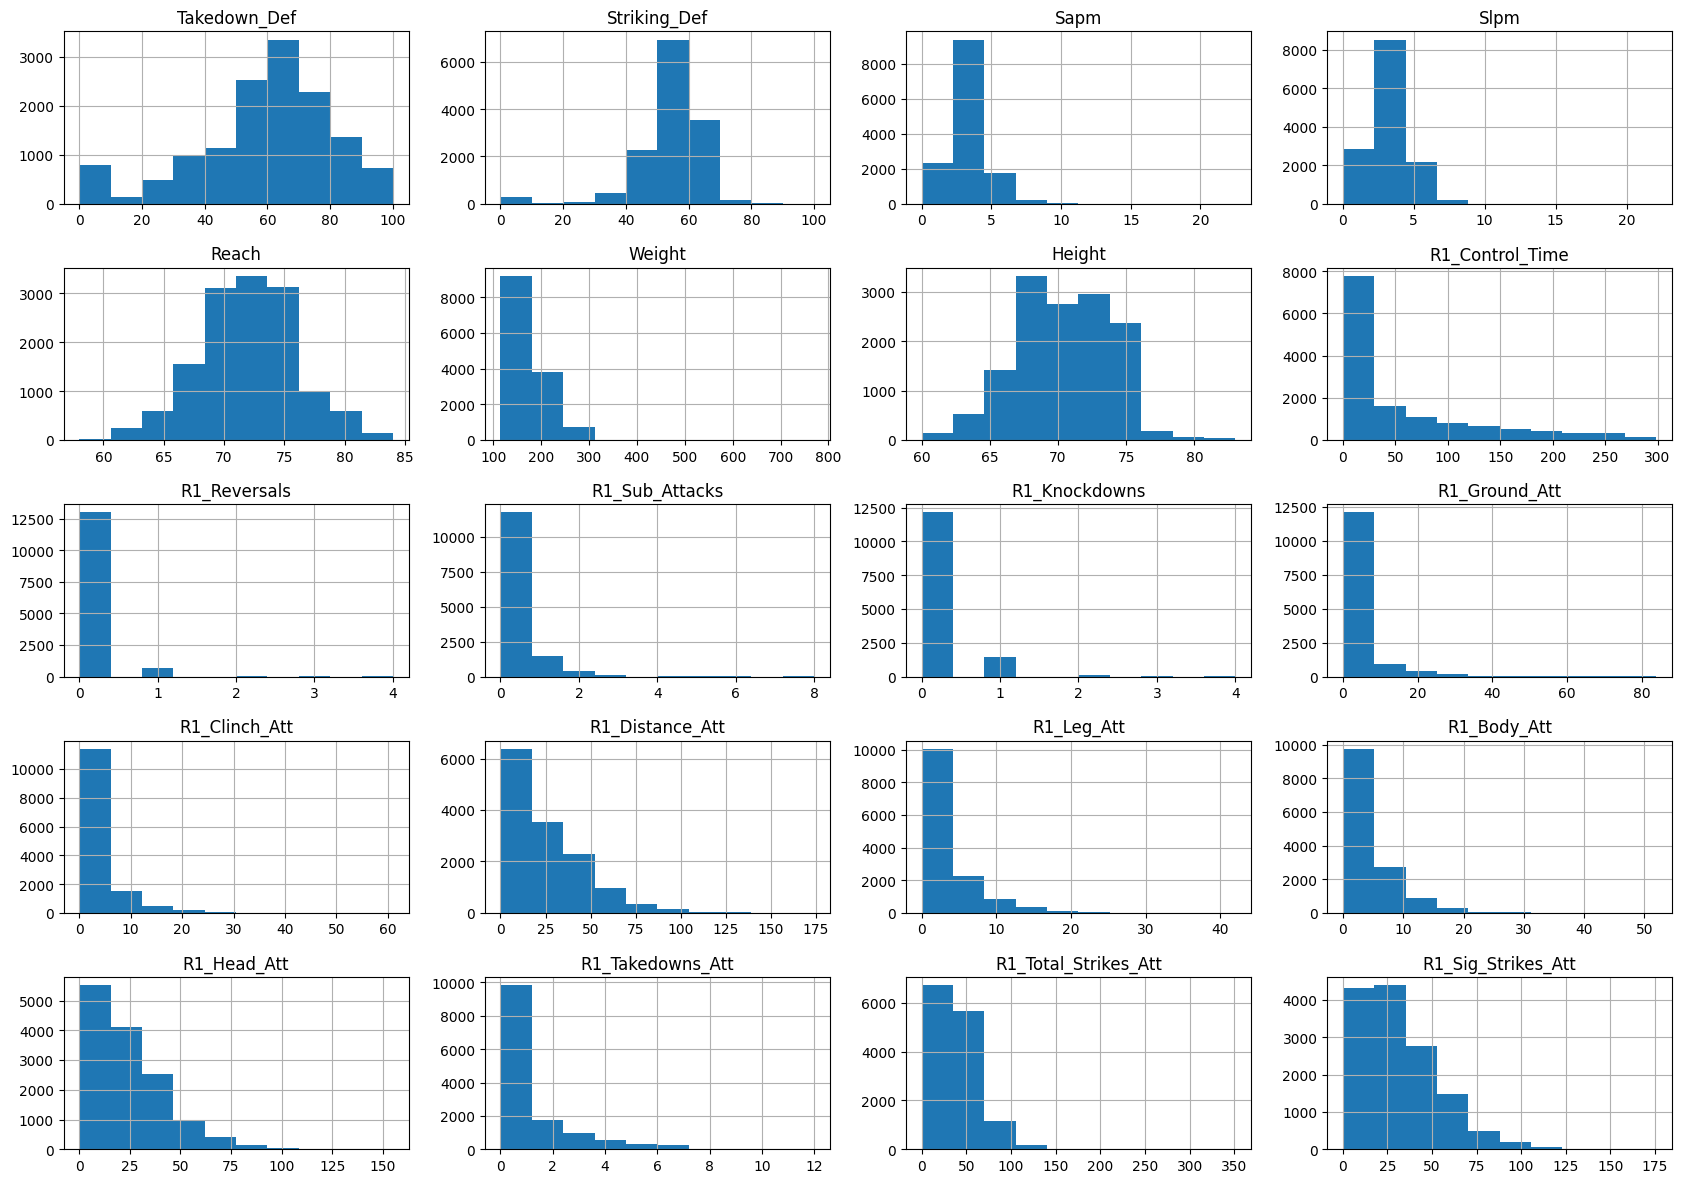

In [55]:
cols_to_plot = [col for col in data.select_dtypes('float64').columns if re.match(r'^(?!R[2-5]+).*$', col) and not col.endswith(('Land', 'Perc', 'Acc', 'Avg'))]
fig, ax = plt.subplots(1, 1, figsize=(17, 12))
_ = data[cols_to_plot].hist(ax=ax)
fig.tight_layout(pad=1.3)

<AxesSubplot: >

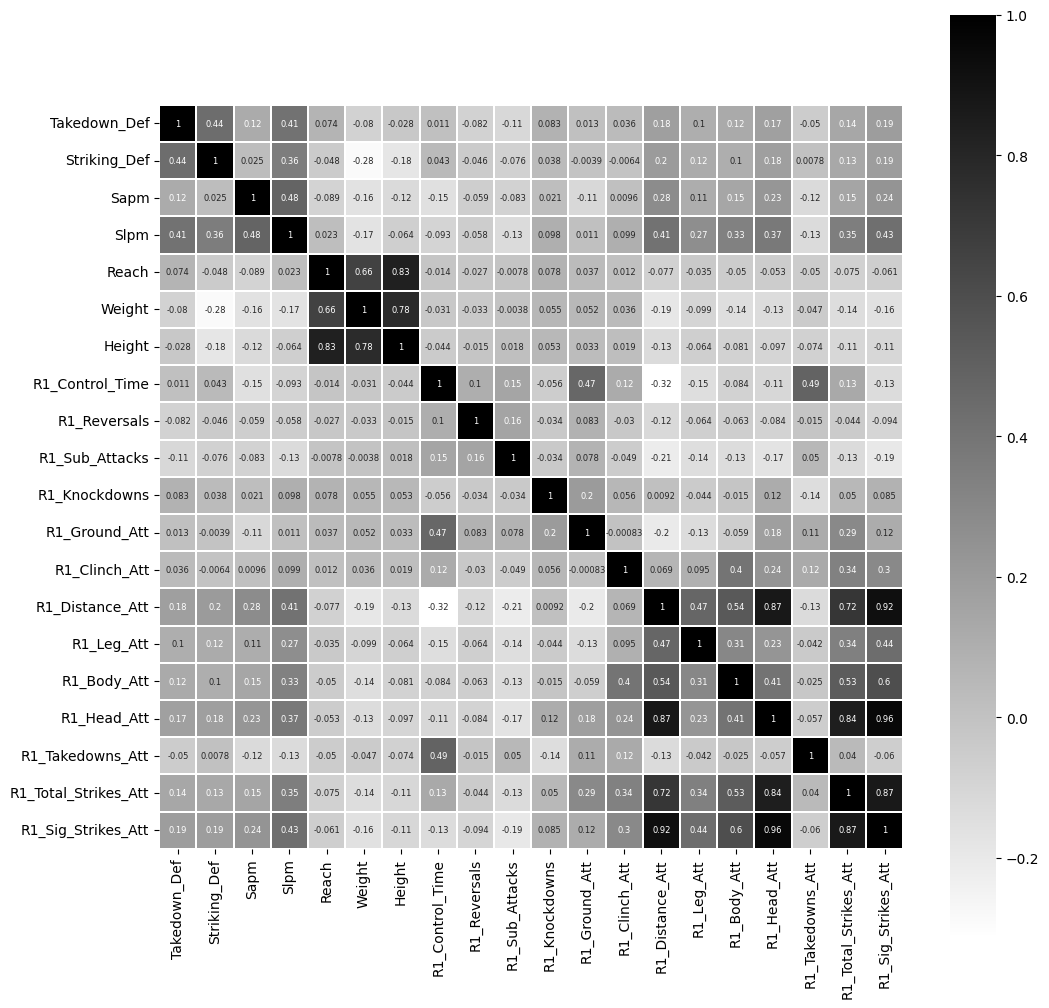

In [92]:
corr = data[cols_to_plot].corr()
fig, ax = plt.subplots(1, 1, figsize=(12,12))
sns.heatmap(corr, ax=ax, square=True, linewidth=0.1, annot=True, annot_kws={'size': 6}, cmap='gist_yarg')

In [102]:
pd.crosstab(data['Stance'], pd.cut(data['R1_Leg_Att'], bins=10), margins=True)

R1_Leg_Att,"(-0.042, 4.2]","(4.2, 8.4]","(8.4, 12.6]","(12.6, 16.8]","(16.8, 21.0]","(21.0, 25.2]","(25.2, 29.4]","(29.4, 33.6]","(33.6, 37.8]","(37.8, 42.0]",All
Stance,,,,,,,,,,,
Open Stance,16,4,3,1,0,0,0,0,0,0,24
Orthodox,7551,1726,664,268,122,38,5,1,1,2,10378
Sideways,4,2,0,0,0,0,0,0,0,0,6
Southpaw,2070,432,148,46,19,1,0,1,0,0,2717
Switch,421,105,45,29,4,2,1,0,0,0,607
All,10062,2269,860,344,145,41,6,2,1,2,13732
